In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the crime data from a CSV file, parse date columns, and set data types
crimes = pd.read_csv("D:/Python Projects/Analyzing Crime in Los Angeles/crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})

# Display the first few rows of the DataFrame
print(crimes.head())

       DR_NO  Date Rptd   DATE OCC TIME OCC    AREA NAME  \
0  221412410 2022-06-15 2020-11-12     1700      Pacific   
1  220314085 2022-07-22 2020-05-12     1110    Southwest   
2  222013040 2022-08-06 2020-06-04     1620      Olympic   
3  220614831 2022-08-18 2020-08-17     1200    Hollywood   
4  231207725 2023-02-27 2020-01-27     0635  77th Street   

                                       Crm Cd Desc  Vict Age Vict Sex  \
0  THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)         0      NaN   
1                                THEFT OF IDENTITY        27        F   
2                                THEFT OF IDENTITY        60        M   
3                                THEFT OF IDENTITY        28        M   
4                                THEFT OF IDENTITY        37        M   

  Vict Descent Weapon Desc  Status Desc  \
0          NaN         NaN  Invest Cont   
1            B         NaN  Invest Cont   
2            H         NaN  Invest Cont   
3            H         NaN  

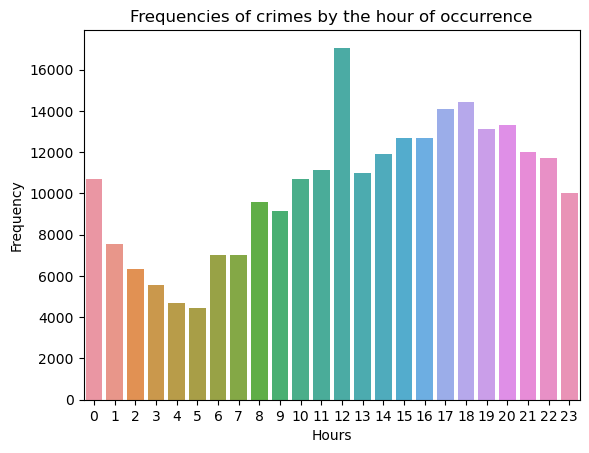

In [3]:
# Extract the hour of occurrence from the 'TIME OCC' column and convert it to an integer
Hour_Occ = crimes['TIME OCC'].str[:2].astype(int)

# Create a count plot to visualize the frequencies of crimes by the hour of occurrence
sns.countplot(x=Hour_Occ)
plt.title('Frequencies of crimes by the hour of occurrence')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

In [4]:
# Find the peak crime hour (hour with the highest frequency)
peak_crime_hour = int(Hour_Occ.value_counts().idxmax())
print(peak_crime_hour)

# Find the maximum frequency of crimes for the peak hour
peak_crime_max = int(Hour_Occ.value_counts().max())
print(peak_crime_max)

12
17065


In [5]:
# Define a list of night hours (10pm to 4am)
night_hours_list = ['22', '23', '0', '1', '2', '3', '4']

# Filter the data for night hours and create a DataFrame
night_hours_df = Hour_Occ[Hour_Occ.isin(night_hours_list)]
print(night_hours_df)

Series([], Name: TIME OCC, dtype: int32)


In [6]:
# Group the data by 'AREA NAME' and 'Crm Cd Desc', and count the number of crimes
area_crime_count = crimes.groupby('AREA NAME')['Crm Cd Desc'].value_counts().reset_index(name='Count')
print(area_crime_count)

# Sort the area crime counts in descending order
area_crime_count_sorted = area_crime_count.sort_values(by='Count', ascending=False)
print(area_crime_count_sorted)

# Extract the first row (highest count) and get the 'AREA NAME'
first_row = area_crime_count_sorted.iloc[0]
peak_night_crime_location = first_row['AREA NAME']
print(peak_night_crime_location)

        AREA NAME                                     Crm Cd Desc  Count
0     77th Street                                VEHICLE - STOLEN   2002
1     77th Street                               THEFT OF IDENTITY   1988
2     77th Street  ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT   1433
3     77th Street                        BATTERY - SIMPLE ASSAULT   1230
4     77th Street               INTIMATE PARTNER - SIMPLE ASSAULT   1012
...           ...                                             ...    ...
1670     Wilshire                                      DRUNK ROLL      1
1671     Wilshire       HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE      1
1672     Wilshire                           SHOPLIFTING - ATTEMPT      1
1673     Wilshire         TILL TAP - GRAND THEFT ($950.01 & OVER)      1
1674     Wilshire                      WEAPONS POSSESSION/BOMBING      1

[1675 rows x 3 columns]
        AREA NAME                                        Crm Cd Desc  Count
81        Central      

In [7]:
# Define age labels and age bins for victim age groups
age_labels = ['<18', '18-25', '26-34', '35-44', '45-54', '55-64', '65+']
age_bins = [0, 17, 25, 34, 44, 54, 64, np.inf]

# Create age brackets and count the number of crimes in each age group
crimes['Age_Bracket'] = pd.cut(crimes['Vict Age'], bins=age_bins, labels=age_labels, right=False)
crime_count_by_age = crimes['Age_Bracket'].value_counts()
print(crime_count_by_age)

<18      65864
26-34    47288
35-44    43759
45-54    29247
18-25    24366
55-64    21116
65+      16315
Name: Age_Bracket, dtype: int64
